In [ ]:
### Test 1A

# Direct Solve & Laplace Equation solve
# u(x,y) = 5.1*( X[:,0] - 0.87 )**2 - 5.1*( X[:,1] + 0.34 )**2
#  in a polar region r = 0.72*cos^5(theta) + 1.3
#  Compare PDE solver with Direct solver

# a. Training steps
# b. Number of interior points
# c. Depth of NN
# d. Width of NN

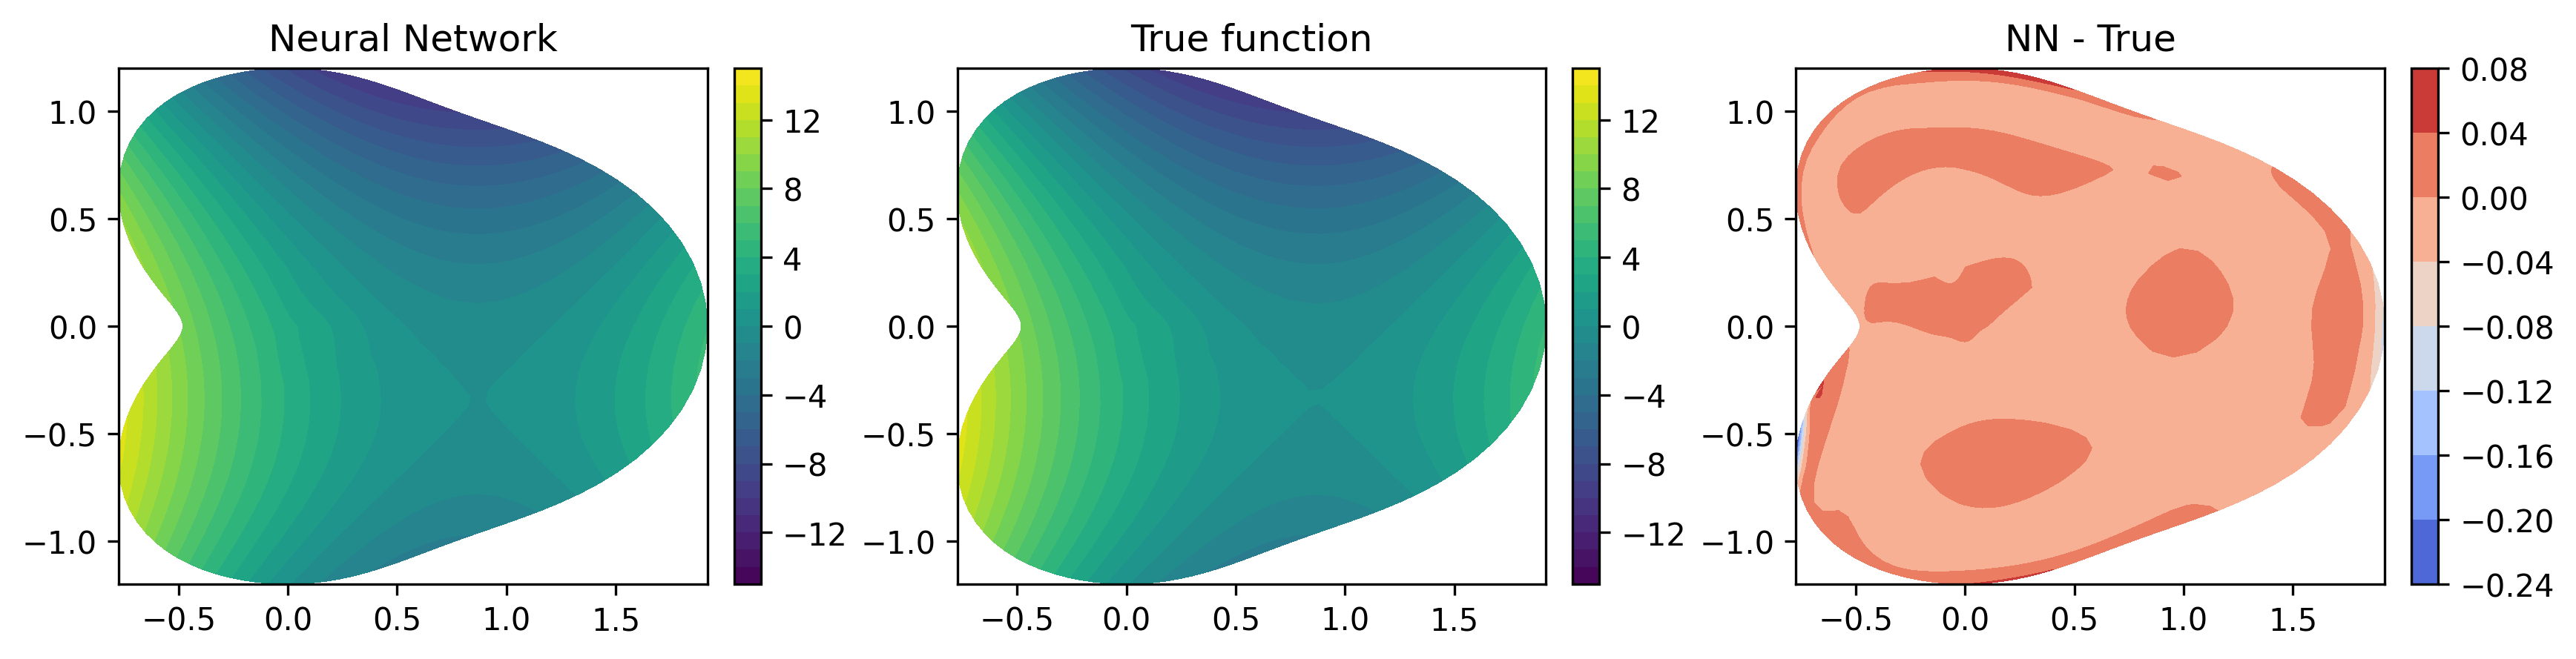

In [61]:
# Test 1: Plot Contours in Domain

import torch
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import DRLPDE.neuralnets as neuralnets
import importlib

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 8

problem = importlib.import_module(".example1", package='examples')

input_dim = [problem.x_dim, problem.t_dim, problem.hyper_dim]
output_dim = problem.output_dim

test = 'Test1A'

with open('experiments/' + test + '_parameters.pickle', 'rb') as f:
    parameters = pickle.load(f)

if parameters['neuralnetwork'] == 'FeedForward':
    MyNeuralNetwork = neuralnets.FeedForwardNN
elif parameters['neuralnetwork'] == 'Incompressible':
    MyNeuralNetwork = neuralnets.IncompressibleNN

nn_size = parameters['nn_size']

model = MyNeuralNetwork(input_dim, output_dim, **nn_size)
model.load_state_dict(torch.load("savedmodels/" + test + ".pt"))

true_fun = problem.true_fun
polar_eq = problem.polar_eq

num_th = 120
num_r = 20

th = torch.linspace(0,2*math.pi, num_th)
r = torch.zeros(num_r, num_th)
for ii in range(num_th):
    r[:,ii] = torch.sqrt( torch.linspace( 0, 1, num_r) )*polar_eq(th[ii])
r = r.reshape(-1)

rth = torch.stack((r, th.repeat(num_r)), dim=1)
X = torch.stack( (rth[:,0]*torch.cos( rth[:,1] ), rth[:,0]*torch.sin( rth[:,1])), dim=1)
#X = X[num_th-1:,:]
#size = num_th*(num_r-1) + 1 

Y = model(X).detach().reshape(num_r, num_th).numpy()
Ytrue = true_fun(X).detach().reshape(num_r, num_th).numpy()

Xplot = X[:,0].detach().reshape(num_r, num_th).numpy()
Yplot = X[:,1].detach().reshape(num_r, num_th).numpy()

levels = np.linspace(-15, 15, 31)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[12, 4])

plt.tight_layout(pad=5.0)

ax[0].set_title('Neural Network')

contour0 = ax[0].contourf( Xplot, Yplot, Y, levels=levels, cmap=plt.cm.viridis)
colorbar0_param = fig.add_axes(
    [ax[0].get_position().x1 + 0.01,
     ax[0].get_position().y0,
     0.01,
     ax[0].get_position().height])
colorbar0 = plt.colorbar(contour0, cax = colorbar0_param)

ax[1].set_title('True function')
contour1 = ax[1].contourf( Xplot, Yplot, Ytrue, levels=levels, cmap=plt.cm.viridis)
colorbar1_param = fig.add_axes(
    [ax[1].get_position().x1 + 0.01,
     ax[1].get_position().y0,
     0.01,
     ax[1].get_position().height])
colorbar1 = plt.colorbar(contour1, cax = colorbar1_param)

ax[2].set_title('NN - True')
contour2 = ax[2].contourf( Xplot, Yplot, Y - Ytrue, cmap=plt.cm.coolwarm)
colorbar2_param = fig.add_axes(
    [ax[2].get_position().x1 + 0.01,
     ax[2].get_position().y0,
     0.01,
     ax[2].get_position().height])
colorbar2 = plt.colorbar(contour2, cax = colorbar2_param)



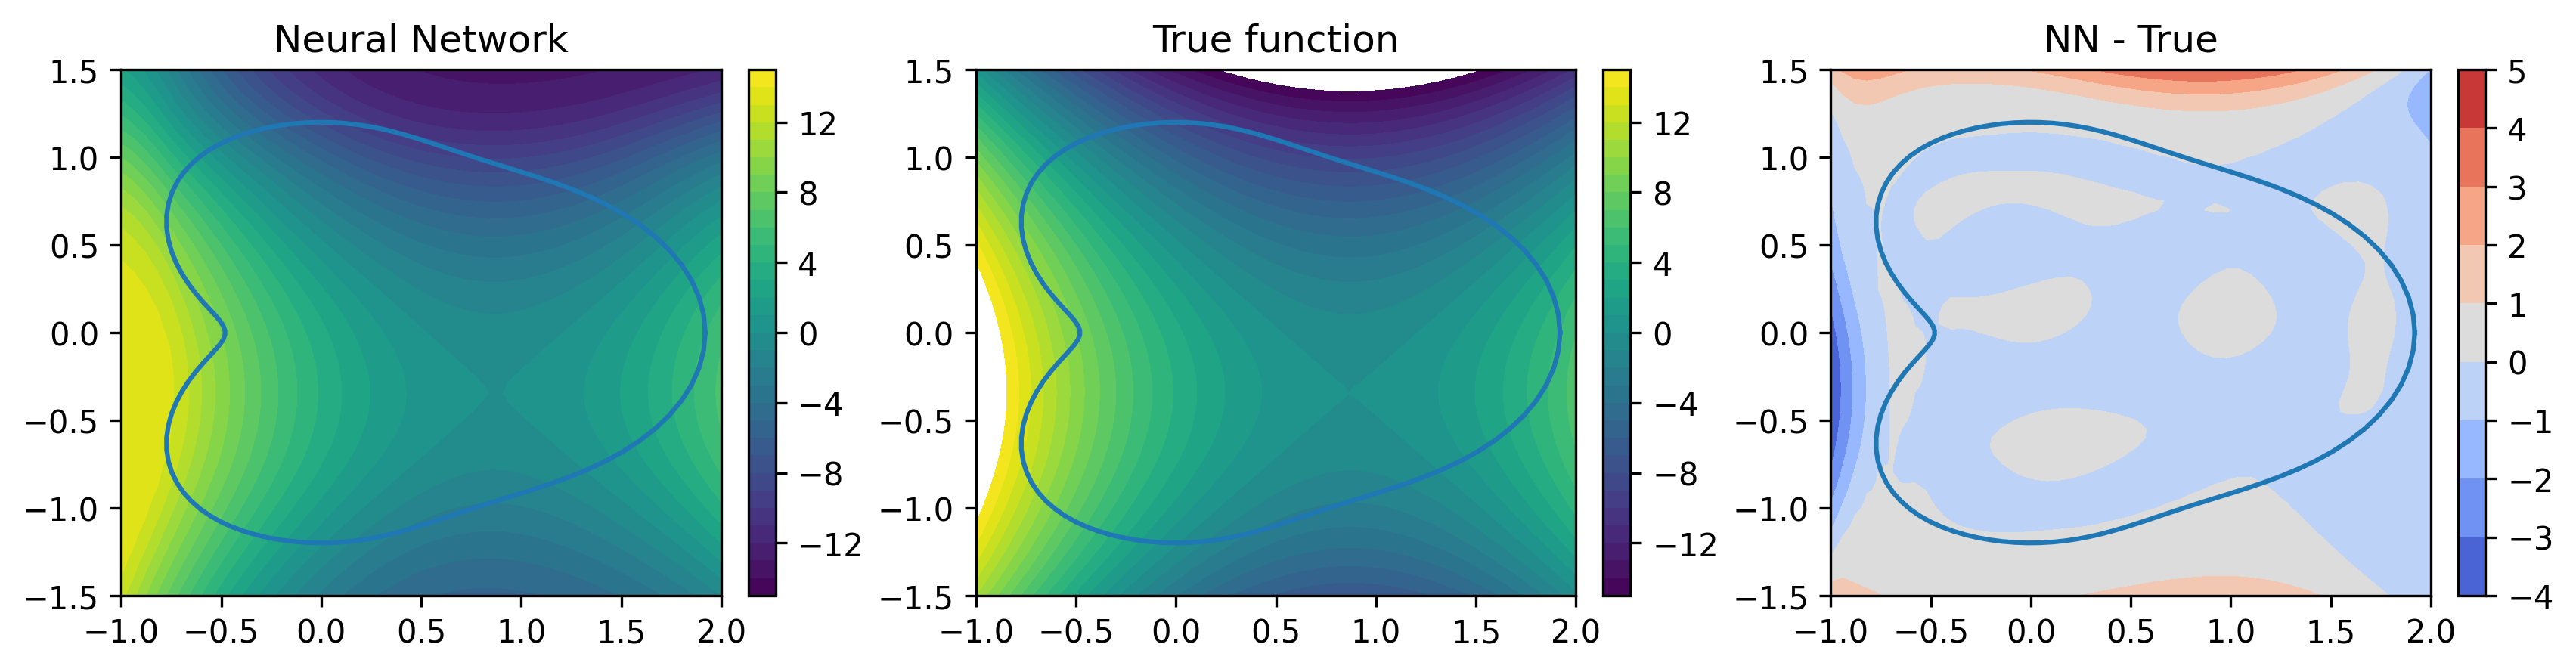

In [62]:
# Test 1: Plot Contours in Rectangle

import torch
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import DRLPDE.neuralnets as neuralnets
import importlib

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 8

problem = importlib.import_module(".example1", package='examples')

input_dim = [problem.x_dim, problem.t_dim, problem.hyper_dim]
output_dim = problem.output_dim
boundingbox = problem.boundingbox

test = 'Test1A'

with open('experiments/' + test + '_parameters.pickle', 'rb') as f:
    parameters = pickle.load(f)

if parameters['neuralnetwork'] == 'FeedForward':
    MyNeuralNetwork = neuralnets.FeedForwardNN
elif parameters['neuralnetwork'] == 'Incompressible':
    MyNeuralNetwork = neuralnets.IncompressibleNN

nn_size = parameters['nn_size']

model = MyNeuralNetwork(input_dim, output_dim, **nn_size)
model.load_state_dict(torch.load("savedmodels/" + test + ".pt"))

true_fun = problem.true_fun
polar_eq = problem.polar_eq

theta = torch.linspace(0, 2*math.pi, 120)
r = polar_eq(theta)
polar_x = r*torch.cos(theta)
polar_y = r*torch.sin(theta)

num_x = 51
num_y = 61

X = torch.cartesian_prod(torch.linspace(boundingbox[0][0], boundingbox[0][1], num_x),
                         torch.linspace(boundingbox[1][0], boundingbox[1][1], num_y))

Y = model(X).detach().reshape(num_x, num_y).numpy()
Ytrue = true_fun(X).detach().reshape(num_x, num_y).numpy()

Xplot = X[:,0].detach().reshape(num_x, num_y).numpy()
Yplot = X[:,1].detach().reshape(num_x, num_y).numpy()

levels = np.linspace(-15, 15, 31)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[12, 4])

plt.tight_layout(pad=5.0)

ax[0].set_title('Neural Network')

contour0 = ax[0].contourf( Xplot, Yplot, Y, levels=levels, cmap=plt.cm.viridis)
ax[0].plot(polar_x, polar_y)
colorbar0_param = fig.add_axes(
    [ax[0].get_position().x1 + 0.01,
     ax[0].get_position().y0,
     0.01,
     ax[0].get_position().height])
colorbar0 = plt.colorbar(contour0, cax = colorbar0_param)

ax[1].set_title('True function')
contour1 = ax[1].contourf( Xplot, Yplot, Ytrue, levels=levels, cmap=plt.cm.viridis)
ax[1].plot(polar_x, polar_y)
colorbar1_param = fig.add_axes(
    [ax[1].get_position().x1 + 0.01,
     ax[1].get_position().y0,
     0.01,
     ax[1].get_position().height])
colorbar1 = plt.colorbar(contour1, cax = colorbar1_param)

ax[2].set_title('NN - True')
contour2 = ax[2].contourf( Xplot, Yplot, Y - Ytrue, cmap=plt.cm.coolwarm)
ax[2].plot(polar_x, polar_y)
colorbar2_param = fig.add_axes(
    [ax[2].get_position().x1 + 0.01,
     ax[2].get_position().y0,
     0.01,
     ax[2].get_position().height])
colorbar2 = plt.colorbar(contour2, cax = colorbar2_param)


Text(0.5, 62.16666666666666, 'number of steps')

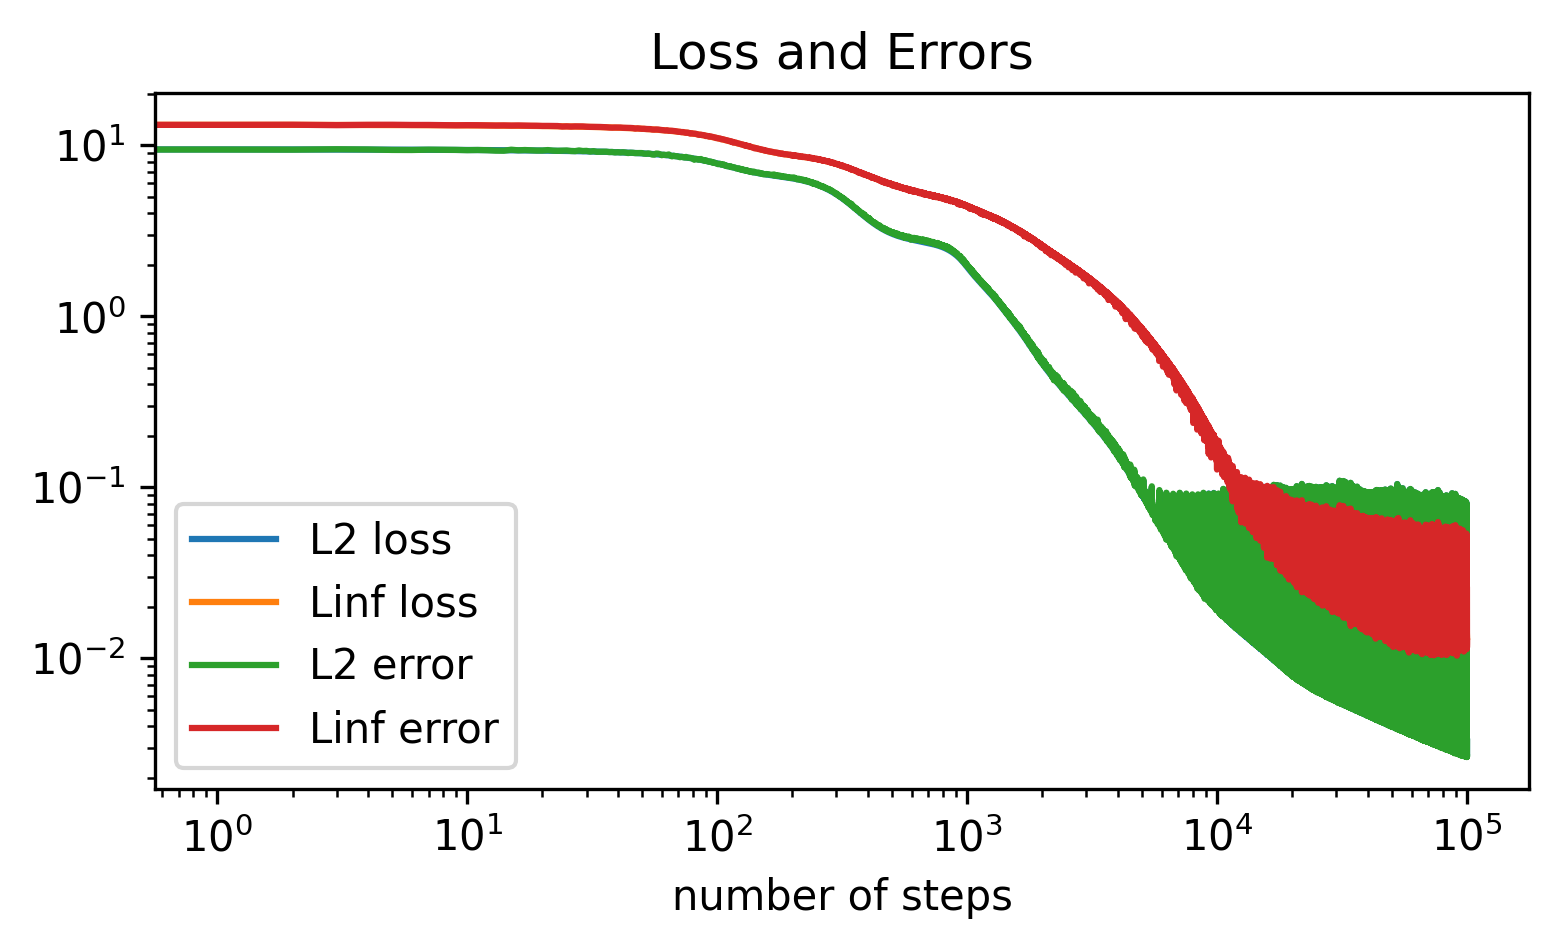

In [2]:
# Plot Test A: (Errors and Losses) vs Steps
# AdaM vs SGD vs SGD momentum
# Performance: AdaM and SGD momentum about the same

import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 8

test = 'Test1A'

with open('experiments/' + test + '_parameters.pickle', 'rb') as f:
    parameters = pickle.load(f)

with open('experiments/'  + test + '_losserror.pickle', 'rb') as f:
    loss_error = pickle.load(f)

steps = range(int(parameters['trainingsteps']))
L2loss = loss_error['loss']['L2 interior loss']
Linfloss = loss_error['loss']['Linf interior loss']
L2error = loss_error['errors']['L2 error']
Linferror = loss_error['errors']['Linf error']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Loss and Errors')

ax.loglog(steps, np.sqrt(L2loss))
ax.loglog(steps, Linfloss)
ax.loglog(steps, np.sqrt(L2error))
ax.loglog(steps, Linferror)
ax.legend(['L2 loss', 'Linf loss', 'L2 error', 'Linf error'])
ax.set_xlabel('number of steps')

#ax[1].set_title('Comparing L2 loss and L2 error')
#ax[1].semilogy(steps, np.abs( 5.1148*L2loss - L2error) )

In [ ]:
# Plot Test B: (Final Errors and Losses) vs Number of Points

import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 8
x = 2**(np.arange(7,17))
L2loss = np.zeros(10)
L2error = np.zeros(10)
Linferror = np.zeros(10)

count = 0
for ii in range(7,17):
    test = 'Test1B_' + str(ii)

    with open('experiments/'  + test + '_losserror.pickle', 'rb') as f:
        loss_error = pickle.load(f)
    
    L2loss[count] = loss_error['loss']['L2 interior loss'][-1]
    L2error[count] = loss_error['errors']['L2 error'][-1]
    Linferror[count] = loss_error['errors']['Linf error'][-1]
    count += 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Final Loss and Errors')

plt.yscale('log', base=10)
plt.xscale('log', base=2)

ax.scatter(x, L2loss)
ax.scatter(x, L2error)
ax.scatter(x, Linferror)
ax.legend(['L2 loss', 'L2 error', 'Linf error'])
ax.set_xlabel('number of points')

In [ ]:
# Plot Test C (Final Errors and Losses) vs Depth

import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 8

x = [2, 4, 8, 16, 32, 64]
L2loss = np.zeros(6)
L2error = np.zeros(6)
Linferror = np.zeros(6)

count = 0
for ii in [2, 4, 8, 16, 32, 64]:
    test = 'Test1C_' + str(ii)

    with open('experiments/'  + test + '_losserror.pickle', 'rb') as f:
        loss_error = pickle.load(f)
    
    L2loss[count] = loss_error['loss']['L2 interior loss'][-1]
    L2error[count] = loss_error['errors']['L2 error'][-1]
    Linferror[count] = loss_error['errors']['Linf error'][-1]
    count += 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Final Loss and Errors')

plt.yscale('log', base=10)
plt.xscale('log', base=2)

ax.scatter(x, L2loss)
ax.scatter(x, L2error)
ax.scatter(x, Linferror)
ax.legend(['L2 loss', 'L2 error', 'Linf error'])
ax.set_xlabel('number of points')

In [ ]:
# Plot Test D (Final Errors and Losses) vs Width

import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 8

x = [32, 64, 128, 256, 512, 1024]
L2loss = np.zeros(6)
L2error = np.zeros(6)
Linferror = np.zeros(6)

count = 0
for ii in [32, 64, 128, 256, 512, 1024]:
    test = 'Test1D_' + str(ii)

    with open('experiments/'  + test + '_losserror.pickle', 'rb') as f:
        loss_error = pickle.load(f)
    
    L2loss[count] = loss_error['loss']['L2 interior loss'][-1]
    L2error[count] = loss_error['errors']['L2 error'][-1]
    Linferror[count] = loss_error['errors']['Linf error'][-1]
    count += 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Final Loss and Errors')

plt.yscale('log', base=10)
plt.xscale('log', base=2)

ax.scatter(x, L2loss)
ax.scatter(x, L2error)
ax.scatter(x, Linferror)
ax.legend(['L2 loss', 'L2 error', 'Linf error'])
ax.set_xlabel('number of points')

In [ ]:
# Plot Test E

Text(0.5, 62.16666666666666, 'number of steps')

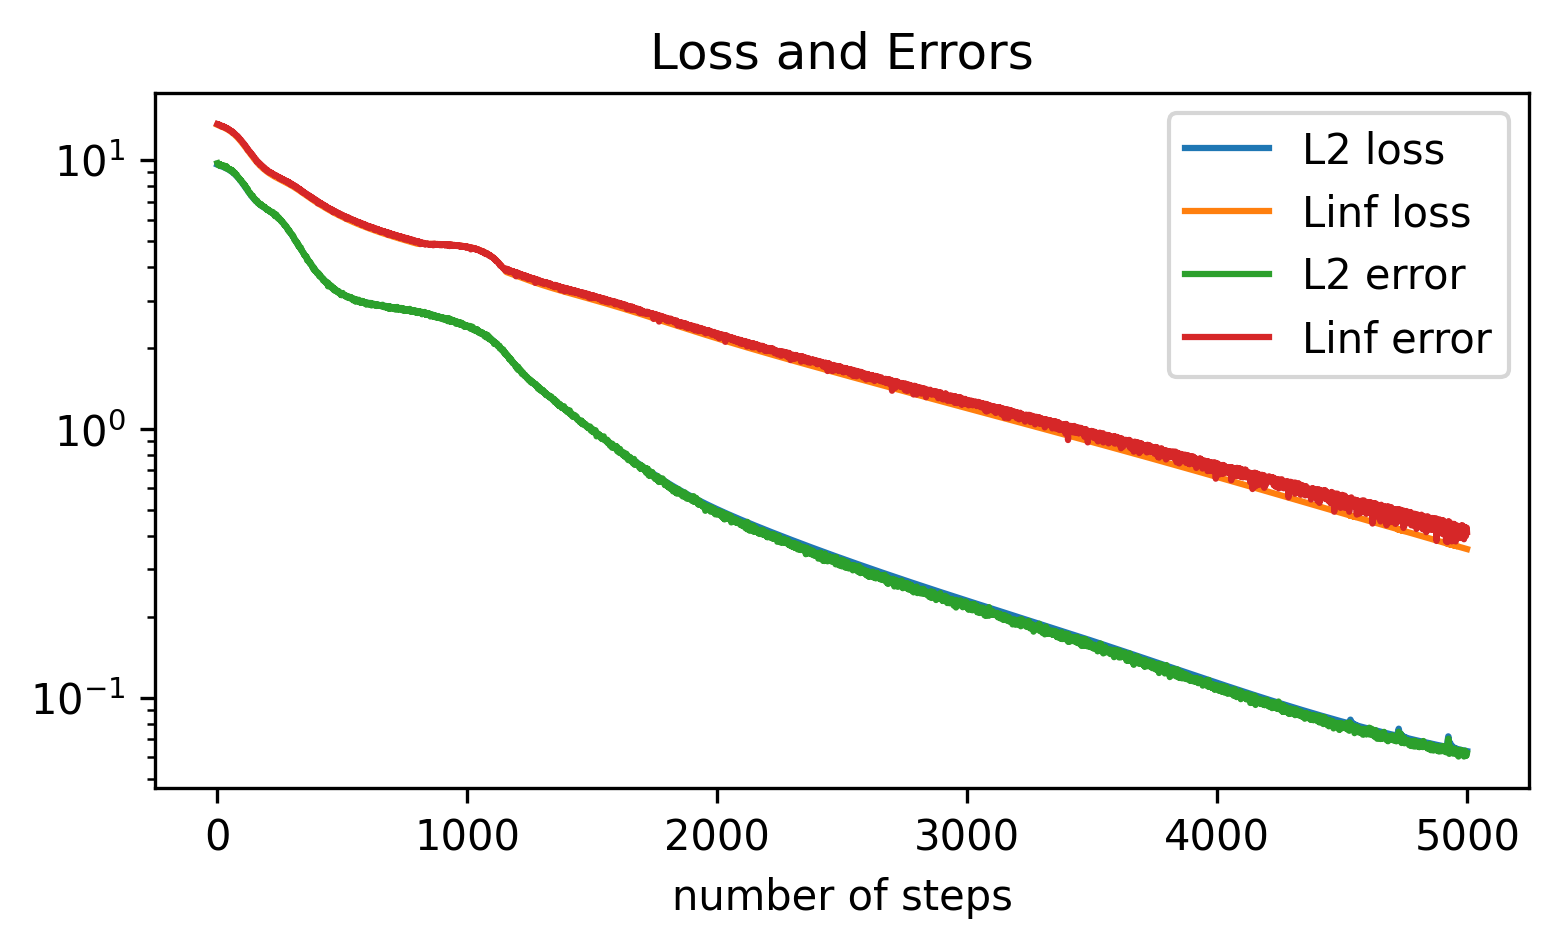

In [5]:
# Plot Test F

import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 8

test = 'Test1F'

with open('experiments/' + test + '_parameters.pickle', 'rb') as f:
    parameters = pickle.load(f)

with open('experiments/'  + test + '_losserror.pickle', 'rb') as f:
    loss_error = pickle.load(f)

steps = range(int(parameters['trainingsteps']))
L2loss = loss_error['loss']['L2 interior loss']
Linfloss = loss_error['loss']['Linf interior loss']
L2error = loss_error['errors']['L2 error']
Linferror = loss_error['errors']['Linf error']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Loss and Errors')

ax.semilogy(steps, np.sqrt(L2loss))
ax.semilogy(steps, Linfloss)
ax.semilogy(steps, np.sqrt(L2error))
ax.semilogy(steps, Linferror)
ax.legend(['L2 loss', 'Linf loss', 'L2 error', 'Linf error'])
ax.set_xlabel('number of steps')

Text(0.5, 62.16666666666666, 'number of steps')

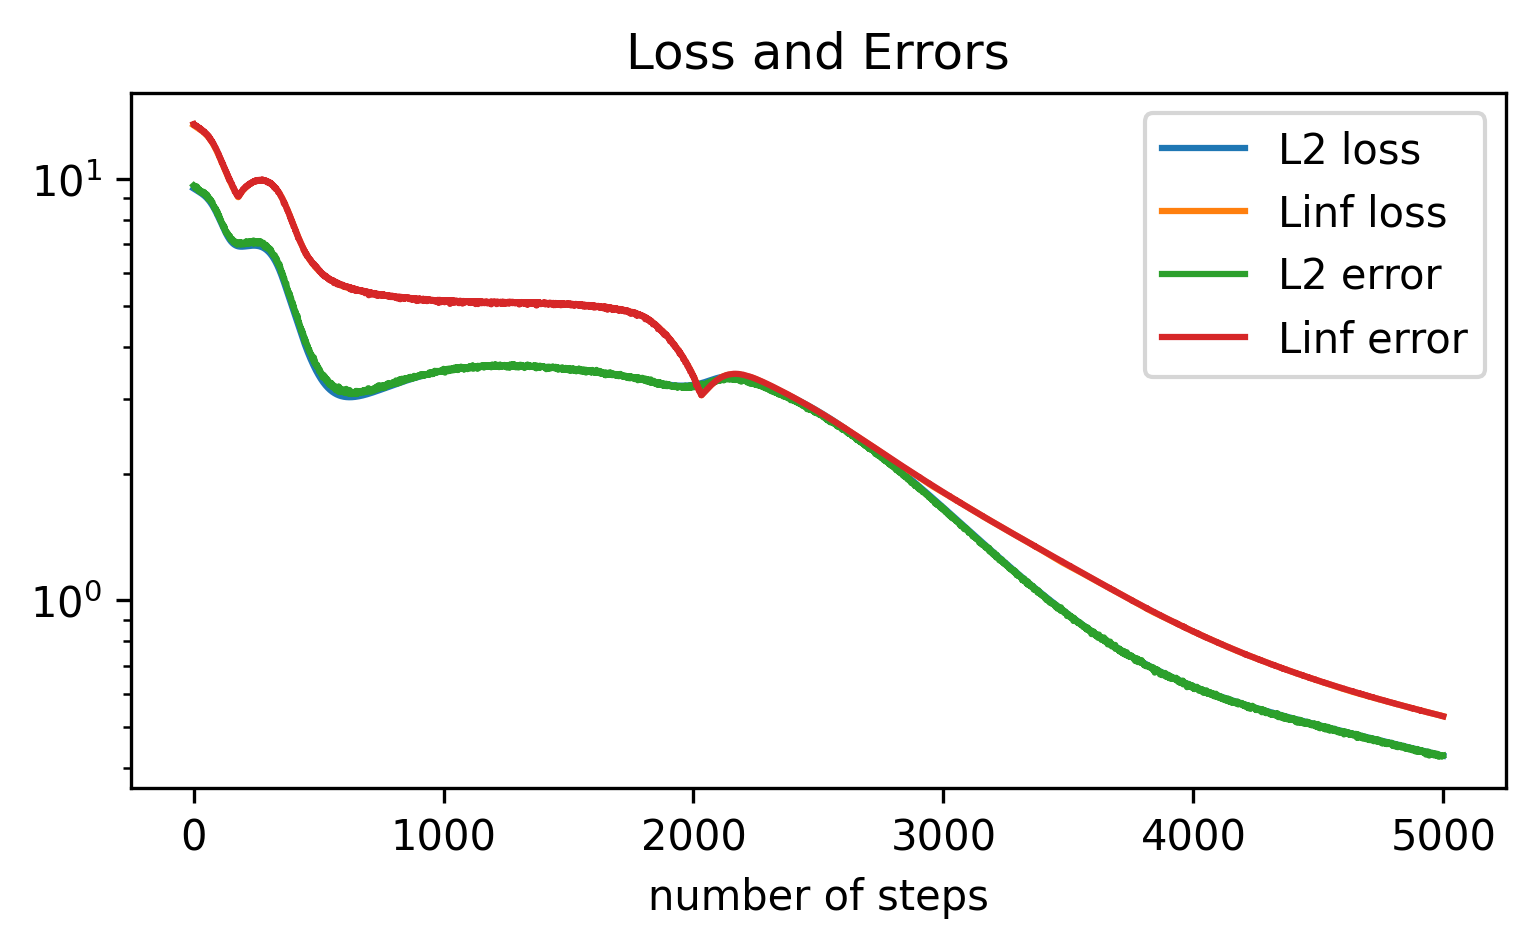

In [7]:
# Plot Test F

import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 8

test = 'Test1F_wall100'

with open('experiments/' + test + '_parameters.pickle', 'rb') as f:
    parameters = pickle.load(f)

with open('experiments/'  + test + '_losserror.pickle', 'rb') as f:
    loss_error = pickle.load(f)

steps = range(int(parameters['trainingsteps']))
L2loss = loss_error['loss']['L2 interior loss']
Linfloss = loss_error['loss']['Linf interior loss']
L2error = loss_error['errors']['L2 error']
Linferror = loss_error['errors']['Linf error']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[6.4, 4])

plt.tight_layout(pad=5.0)

ax.set_title('Loss and Errors')

ax.semilogy(steps, np.sqrt(L2loss))
ax.semilogy(steps, Linfloss)
ax.semilogy(steps, np.sqrt(L2error))
ax.semilogy(steps, Linferror)
ax.legend(['L2 loss', 'Linf loss', 'L2 error', 'Linf error'])
ax.set_xlabel('number of steps')

In [ ]:
# Plot Test G

In [ ]:
# Plot Test H

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8036\1007572233.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=5.0)


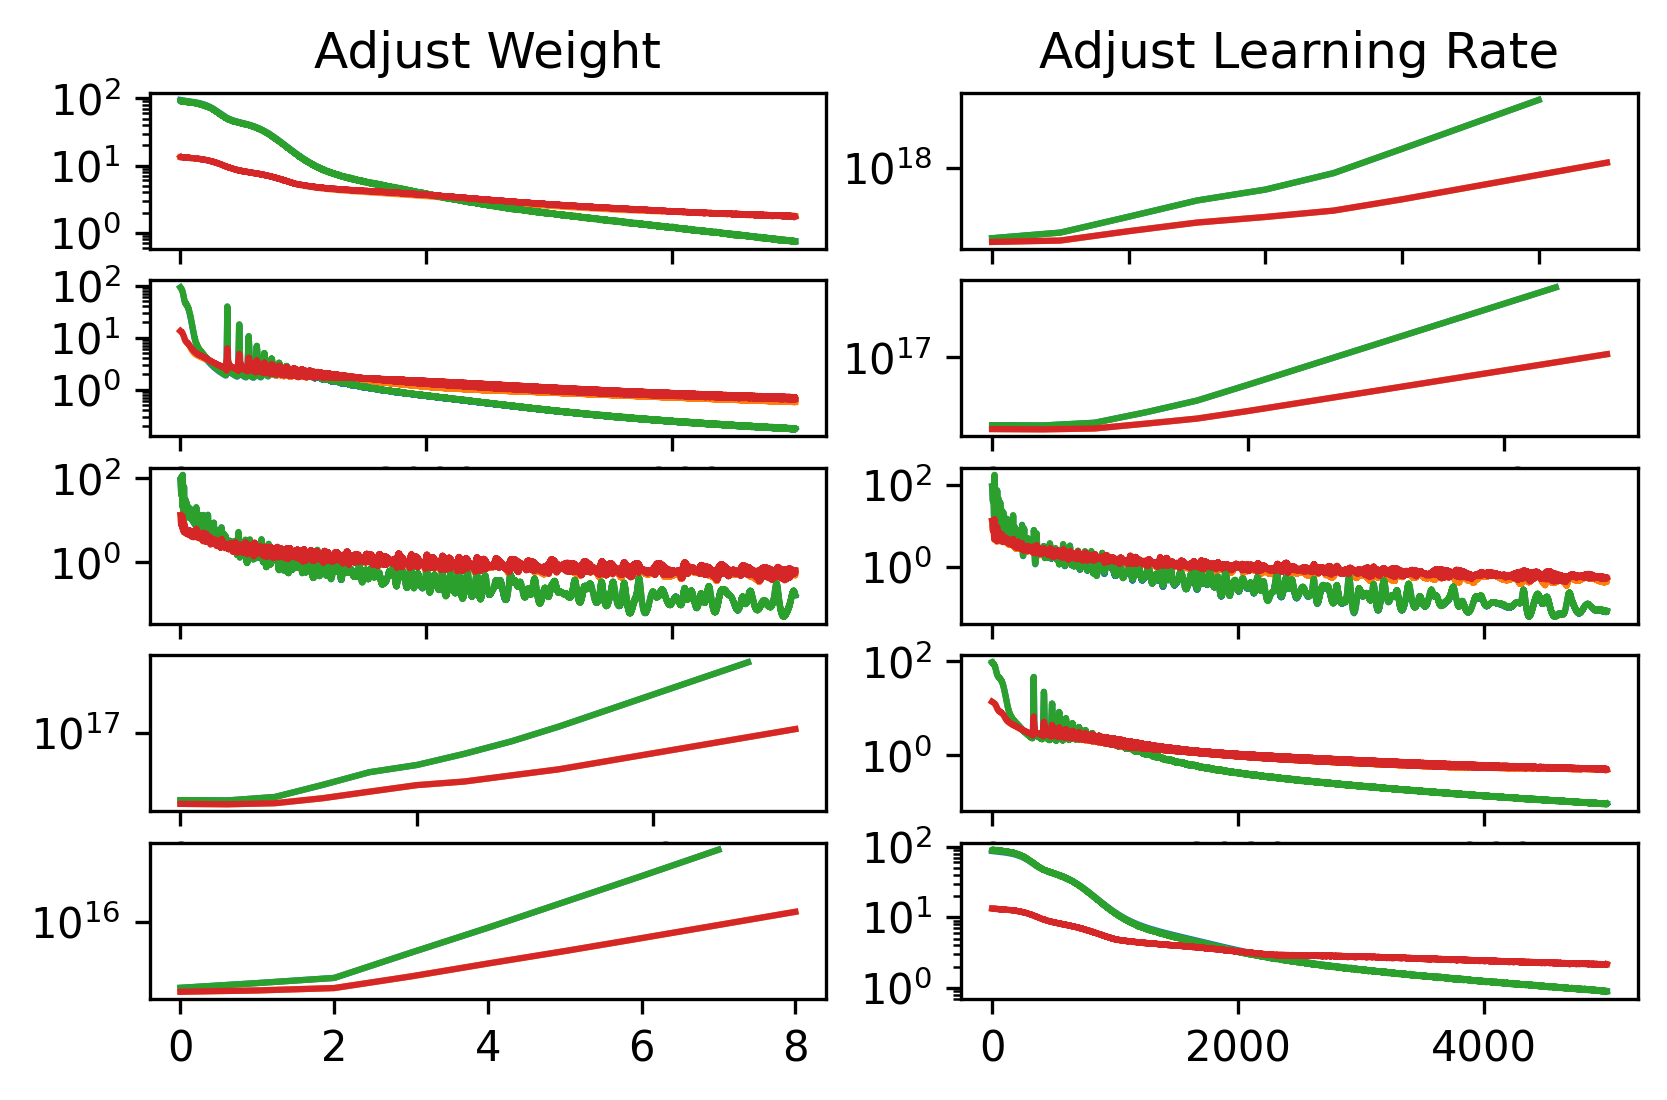

In [51]:
# Plot Test J: Adjust weights vs adjust learning rate

import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 300
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern']
#plt.rcParams['font.size'] = 8

test = 'Test1Jweight'

steps = range(5000)

L2loss = loss_error['loss']['L2 interior loss']
Linfloss = loss_error['loss']['Linf interior loss']
L2error = loss_error['errors']['L2 error']
Linferror = loss_error['errors']['Linf error']

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=[6.4, 4])
plt.tight_layout(pad=5.0)

ax[0,0].set_title('Adjust Weight')
ax[0,1].set_title('Adjust Learning Rate')

for ii in range(0,5):
    with open('experiments/'  + 'Test1J_weight' + str(ii) + '_losserror.pickle', 'rb') as f:
        loss_error_weight = pickle.load(f)

    L2loss_weight = loss_error_weight['loss']['L2 interior loss']
    Linfloss_weight = loss_error_weight['loss']['Linf interior loss']
    L2error_weight = loss_error_weight['errors']['L2 error']
    Linferror_weight = loss_error_weight['errors']['Linf error']

    ax[ii,0].semilogy(steps, L2loss_weight)
    ax[ii,0].semilogy(steps, Linfloss_weight)
    ax[ii,0].semilogy(steps, L2error_weight)
    ax[ii,0].semilogy(steps, Linferror_weight)

    #ax[ii,0].legend(['L2 loss', 'Linfloss', 'L2 error', 'Linf error'])

    with open('experiments/'  + 'Test1J_lr' + str(ii) + '_losserror.pickle', 'rb') as f:
        loss_error_lr = pickle.load(f)

    L2loss_lr = loss_error_lr['loss']['L2 interior loss']
    Linfloss_lr = loss_error_lr['loss']['Linf interior loss']
    L2error_lr = loss_error_lr['errors']['L2 error']
    Linferror_lr = loss_error_lr['errors']['Linf error']

    ax[ii,1].semilogy(steps, L2loss_lr)
    ax[ii,1].semilogy(steps, Linfloss_lr)
    ax[ii,1].semilogy(steps, L2error_lr)
    ax[ii,1].semilogy(steps, Linferror_lr)

    #ax[ii,1].legend(['L2 loss', 'Linfloss', 'L2 error', 'Linf error'])
